# plot_decision_regions

In [ ]:

from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')

# Zadanie

##1. Rozdziel zestaw danych na podzbiory uczący i testowy,

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [1,2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

##2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty.
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy którą można wykorzystać do kostrukcji drzewa decyzyjnego znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

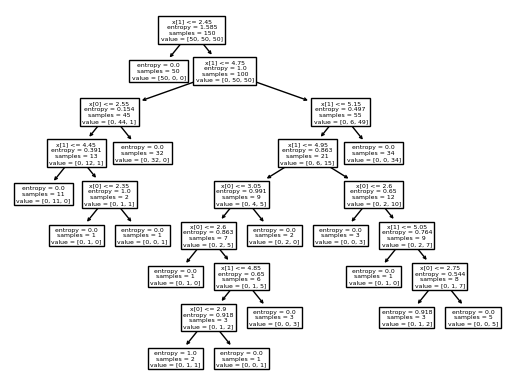

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


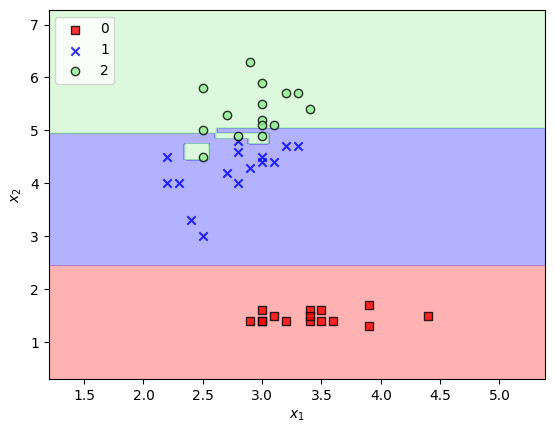

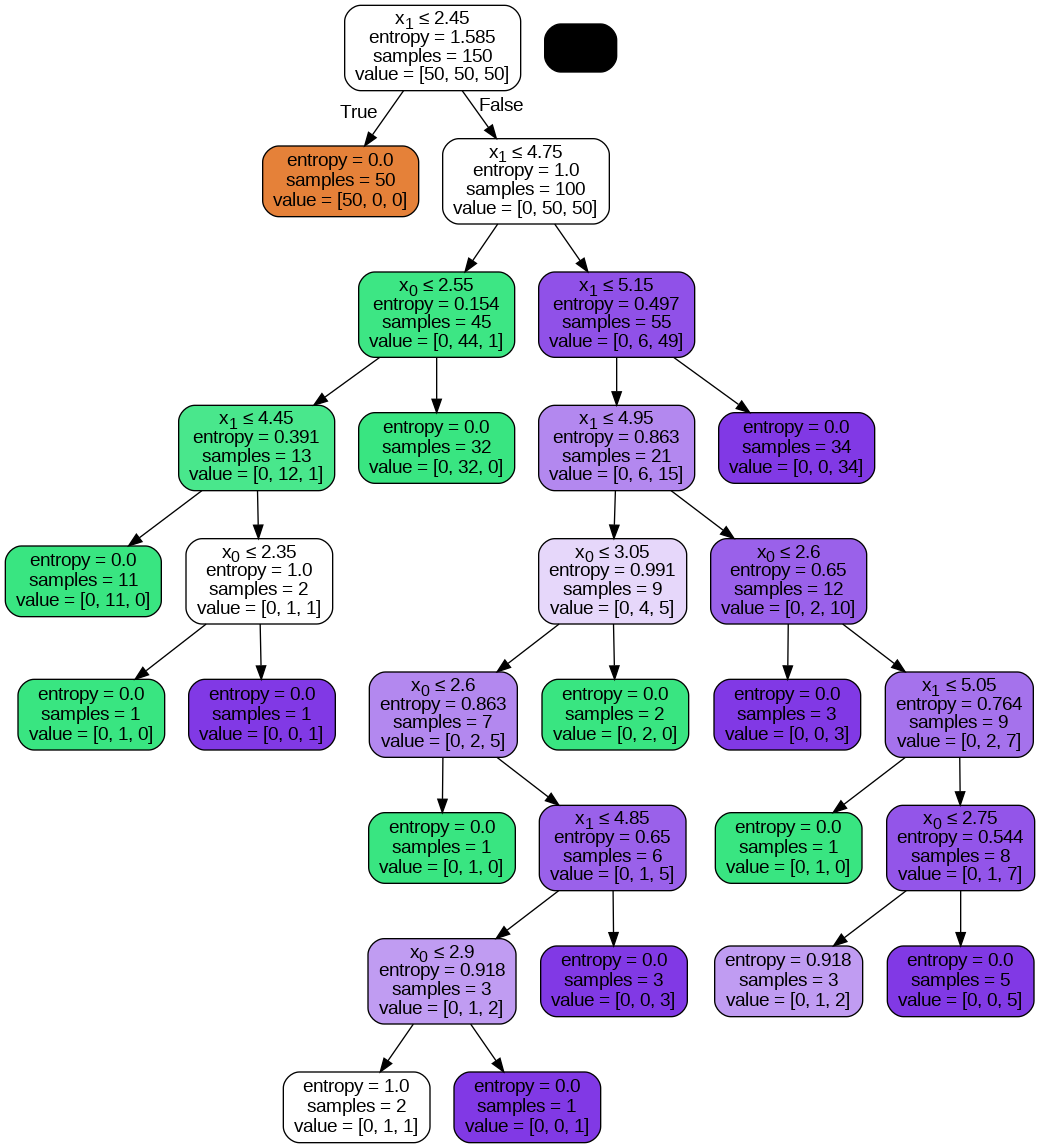

In [ ]:
clfent = tree.DecisionTreeClassifier(criterion='entropy') # Uzupełnić parametry konstruktora
clfent = clfent.fit(X, y)
tree.plot_tree(clfent)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=clfent)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

dat = export_graphviz(clfent, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('clfent.png')
Image(graph.create_png())

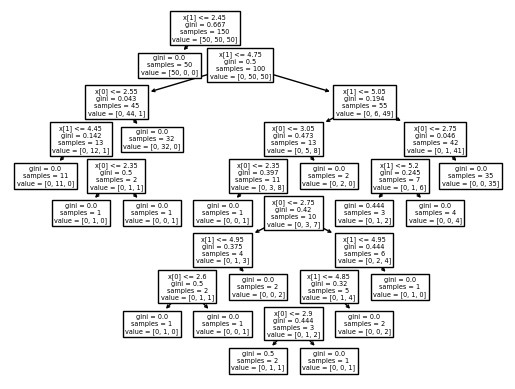

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


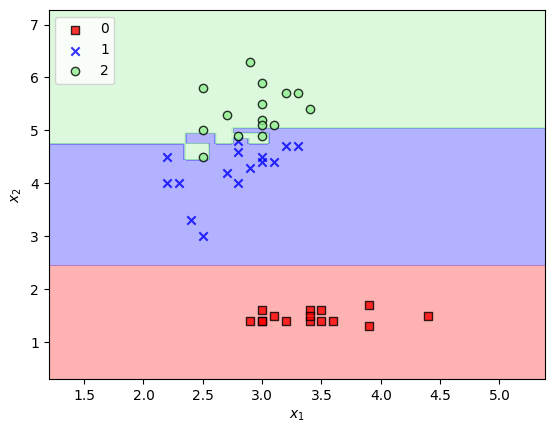

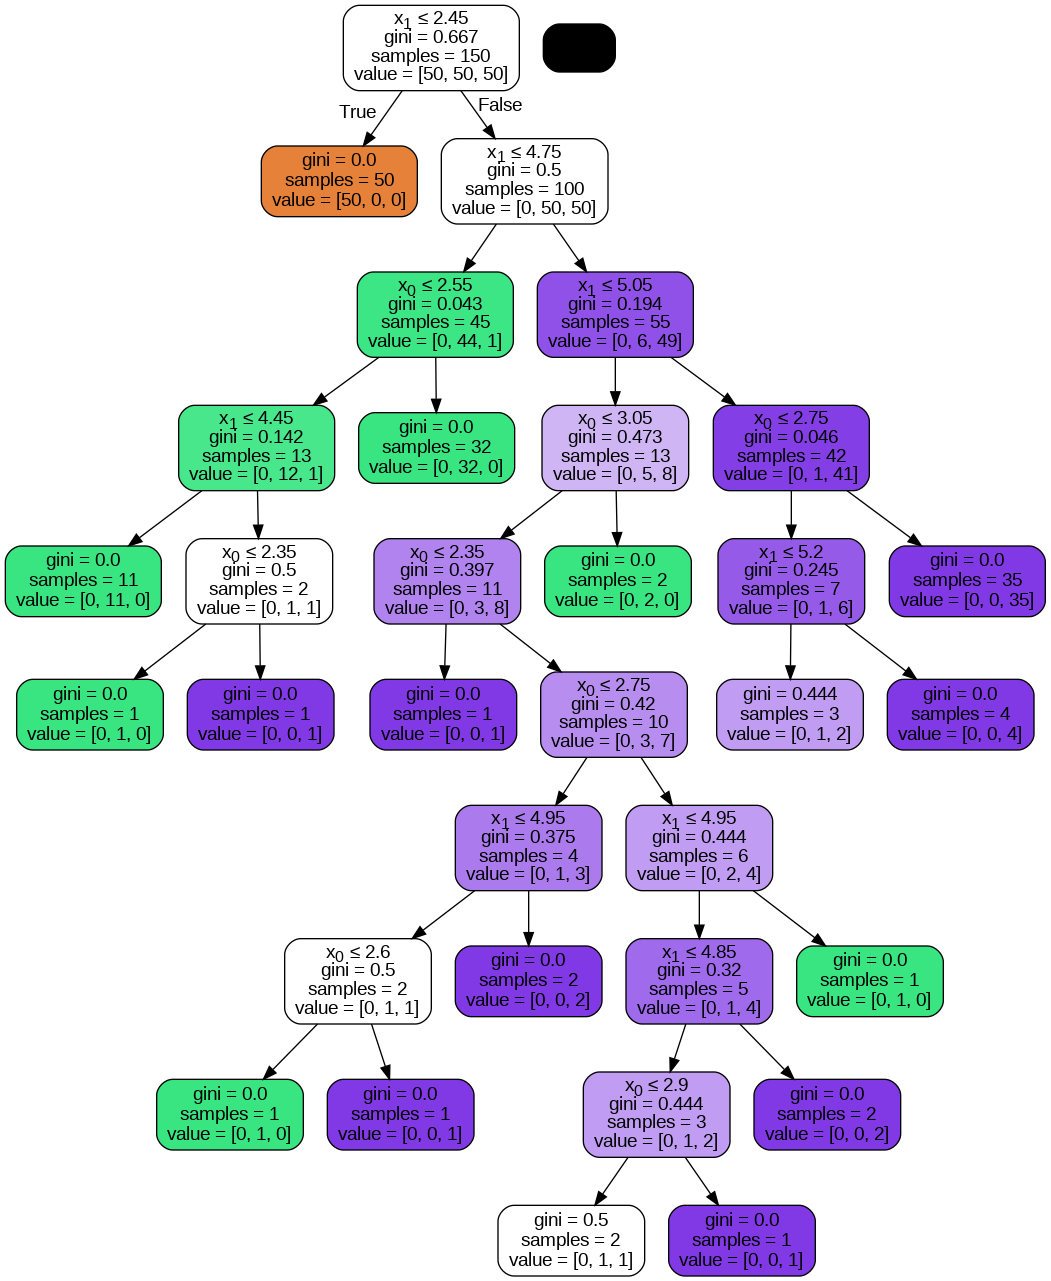

In [ ]:
clfgini = tree.DecisionTreeClassifier(criterion='gini') # Uzupełnić parametry konstruktora
clfgini = clfgini.fit(X, y)
tree.plot_tree(clfgini)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=clfgini)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

dat = export_graphviz(clfgini, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('clfgini.png')
Image(graph.create_png())

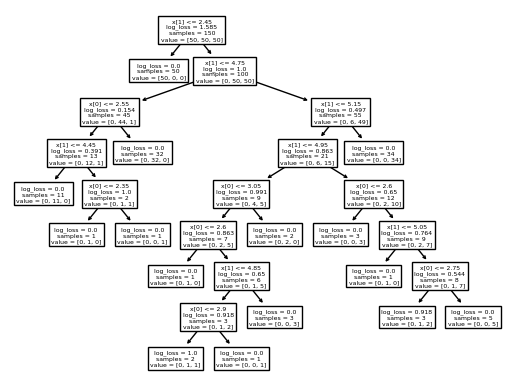

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


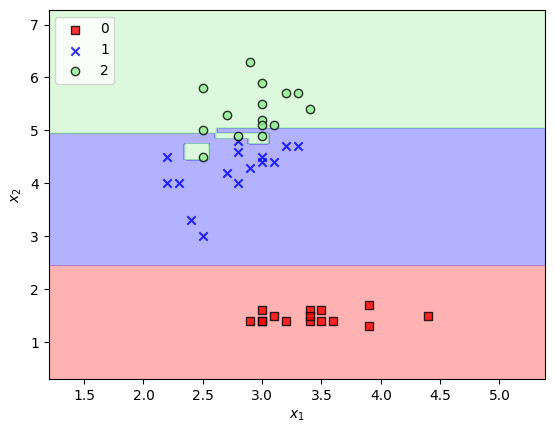

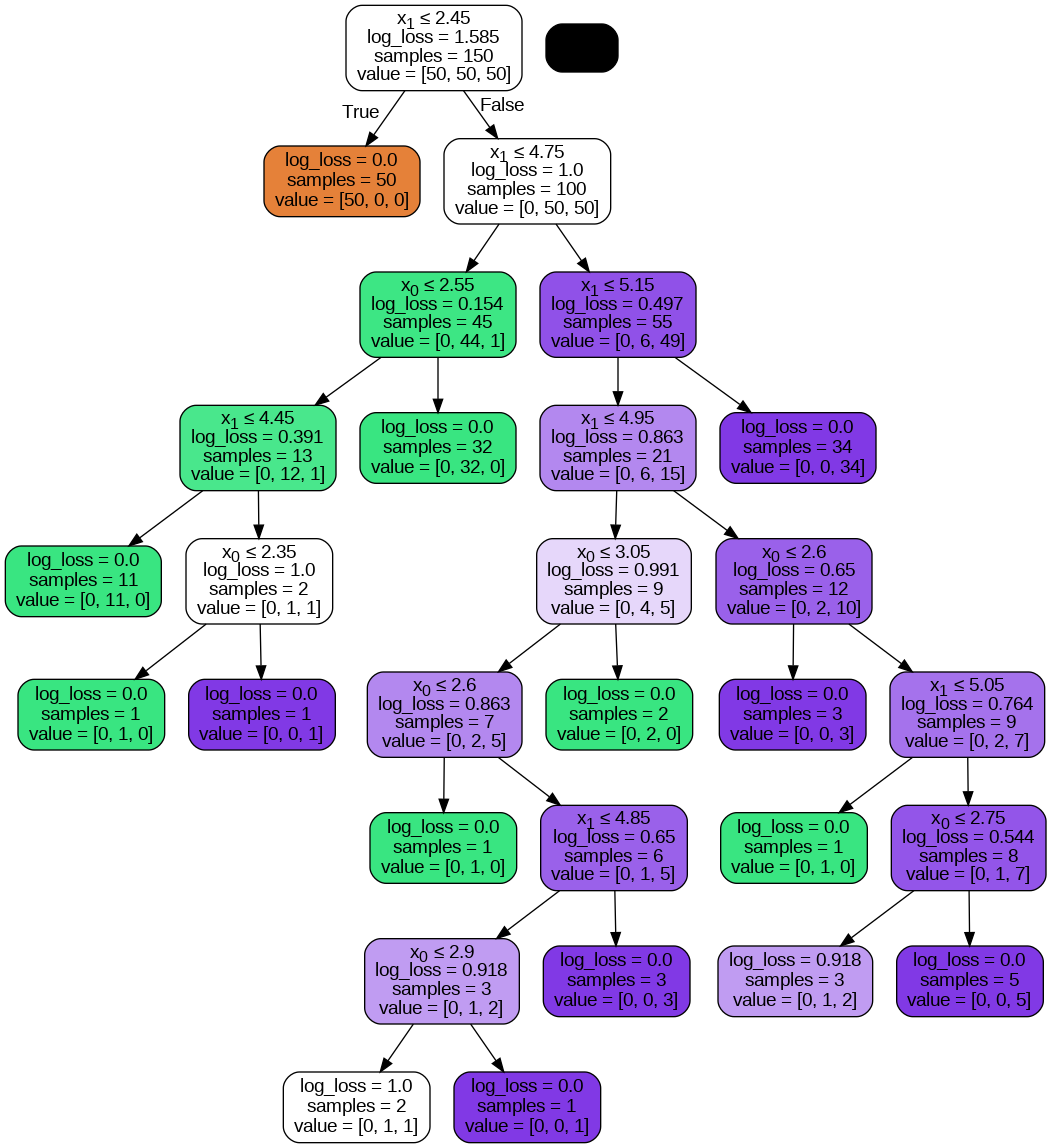

In [ ]:
clflog = tree.DecisionTreeClassifier(criterion='log_loss') # Uzupełnić parametry konstruktora
clflog = clflog.fit(X, y)
tree.plot_tree(clflog)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=clflog)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

dat = export_graphviz(clflog, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('clflog.png')
Image(graph.create_png())

##3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty,

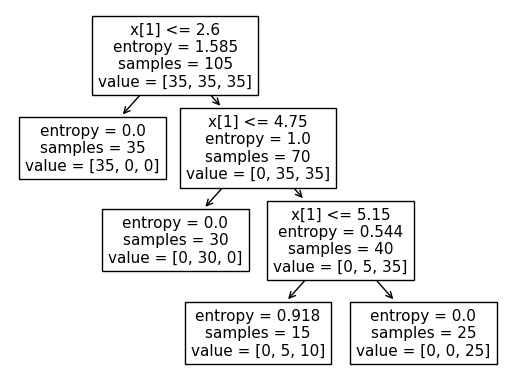

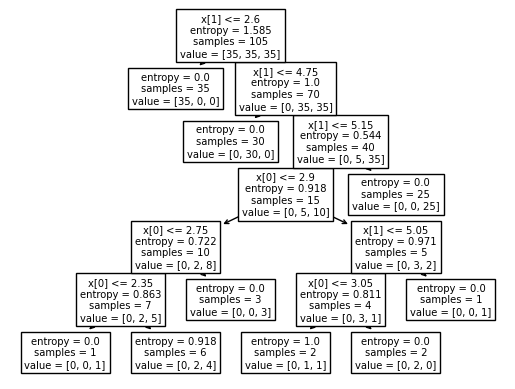

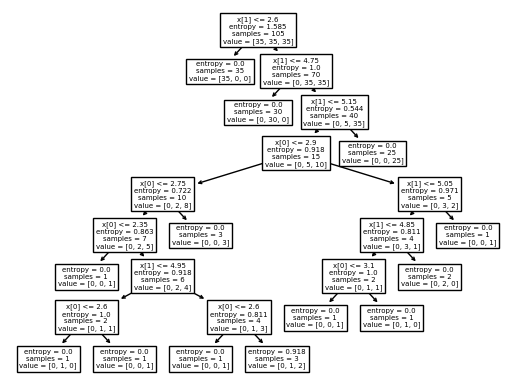

In [ ]:
# Drzewo z współczynnikiem entropy (depth=3)
clfent.max_depth = 3
clfent = clfent.fit(X_train, y_train)
plt.title('Tree : entropy - depth=3')
tree.plot_tree(clfent)
plt.show()

# Drzewo z współczynnikiem entropy (depth=6)
clfent.max_depth = 6
clfent = clfent.fit(X_train, y_train)
plt.title('Tree : entropy - depth=6')
tree.plot_tree(clfent)
plt.show()

# Drzewo z współczynnikiem entropy (depth=9)
clfent.max_depth = 9
clfent = clfent.fit(X_train, y_train)
plt.title('Tree : entropy - depth=9')
tree.plot_tree(clfent)
plt.show()

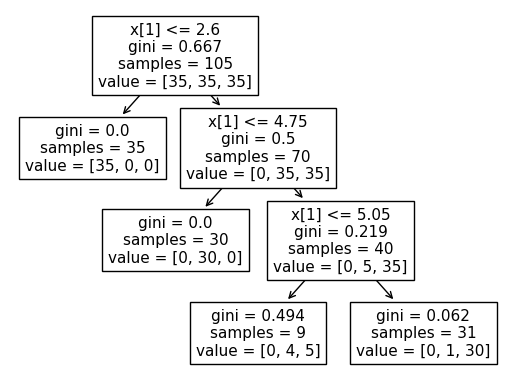

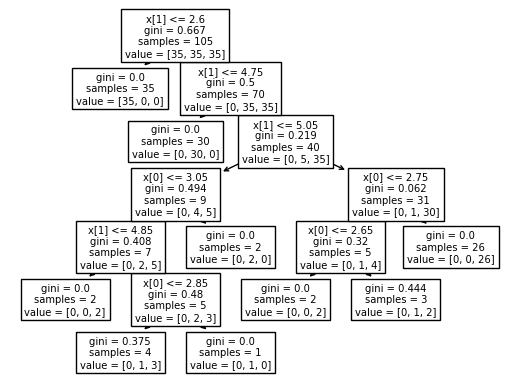

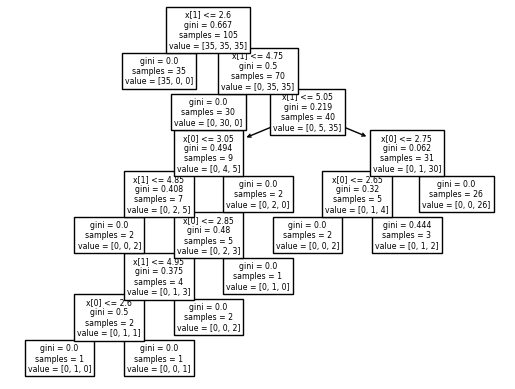

In [ ]:
# Drzewo z współczynnikiem Giniego (depth=3)
clfgini.max_depth = 3
clfgini = clfgini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=3')
tree.plot_tree(clfgini)
plt.show()

# Drzewo z współczynnikiem Giniego (depth=6)
clfgini.max_depth = 6
clfgini = clfgini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=6')
tree.plot_tree(clfgini)
plt.show()

# Drzewo z współczynnikiem Giniego (depth=9)
clfgini.max_depth = 9
clfgini = clfgini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=9')
tree.plot_tree(clfgini)
plt.show()

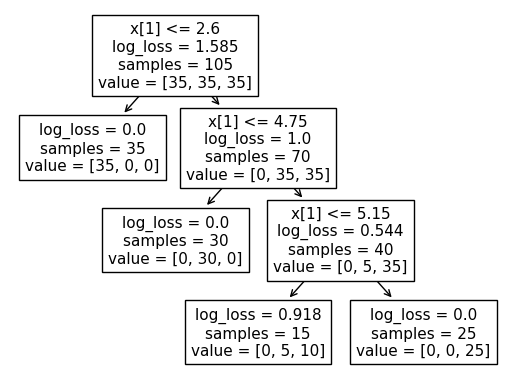

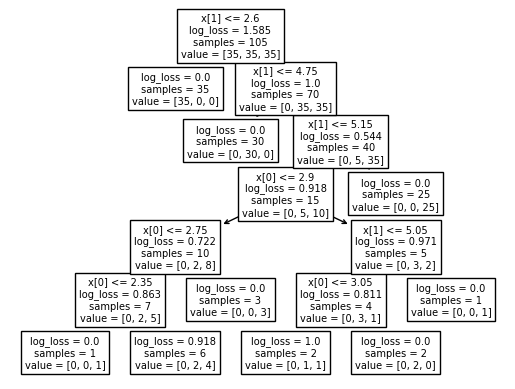

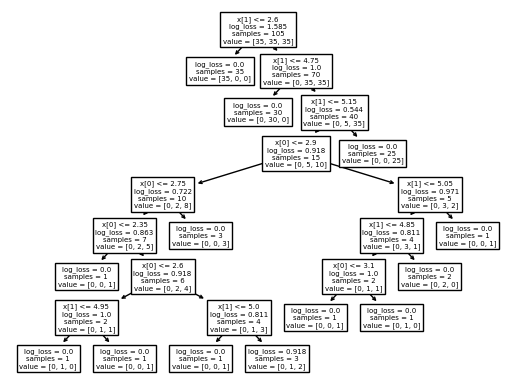

In [ ]:
# Drzewo z współczynnikiem log_loss (depth=3)
clflog.max_depth = 3
clflog = clflog.fit(X_train, y_train)
plt.title('Tree : log_loss - depth=3')
tree.plot_tree(clflog)
plt.show()

# Drzewo z współczynnikiem log_loss (depth=6)
clflog.max_depth = 6
clflog = clflog.fit(X_train, y_train)
plt.title('Tree : Gini - depth=6')
tree.plot_tree(clflog)
plt.show()

# Drzewo z współczynnikiem log_loss (depth=9)
clflog.max_depth = 9
clflog = clflog.fit(X_train, y_train)
plt.title('Tree : log_loss - depth=9')
tree.plot_tree(clflog)
plt.show()

# opis
W sytuacji, gdy mamy do czynienia z dużą liczbą klas, klasyfikacja jest wykonywana lepiej. Głębokość drzewa ma wpływ na liczbę utworzonych klas, co prowadzi do większego zróżnicowania. Jeśli jednak liczba klas jest niewystarczająca, obiekty zostaną przypisane do istniejących klas, które zostały już utworzone.

##4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


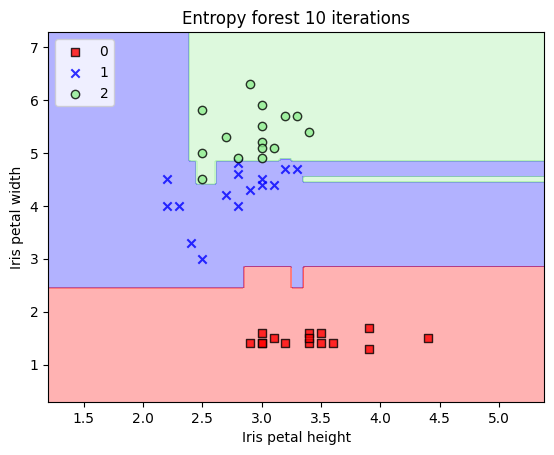

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


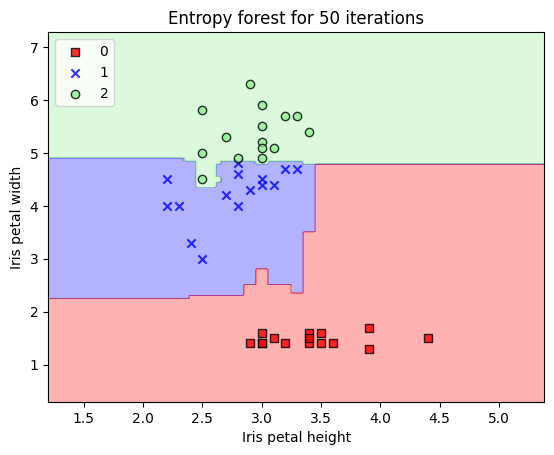

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


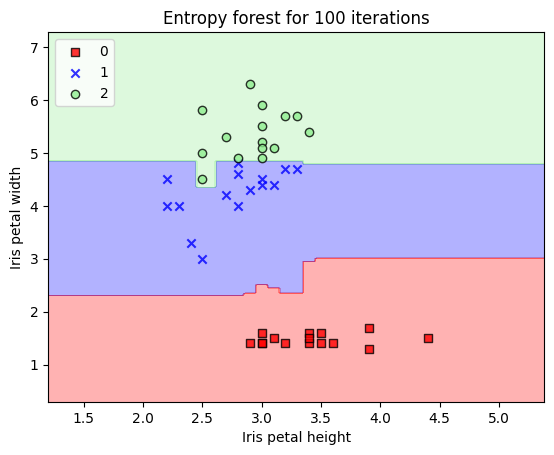

In [ ]:
# Mały las dla entropii - 10 iteracji
forest_entropy_small = RandomForestClassifier(criterion='entropy', n_estimators=10)
forest_entropy_small.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_small, test_idx=range(105, 150))
plt.title('Entropy forest 10 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Duży las dla entropii - 50 iteracji
forest_entropy_big = RandomForestClassifier(criterion='entropy', n_estimators=50)
forest_entropy_big.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_big, test_idx=range(105, 150))
plt.title('Entropy forest for 50 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Wielki las dla entropii - 100 iteracji
forest_entropy_large = RandomForestClassifier(criterion='entropy', n_estimators=100)
forest_entropy_large.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_large, test_idx=range(105, 150))
plt.title('Entropy forest for 100 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


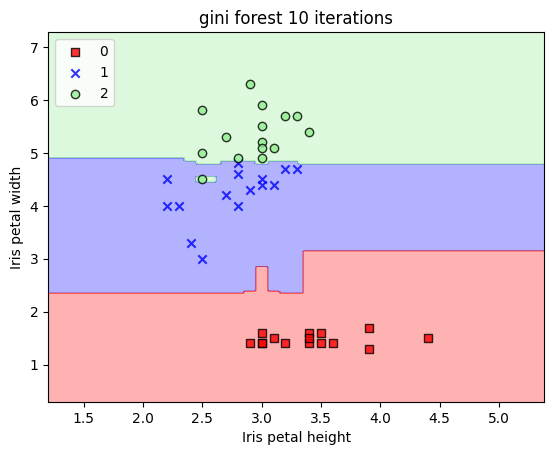

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


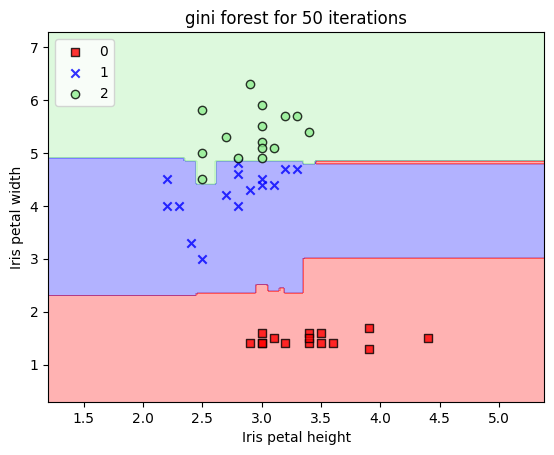

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


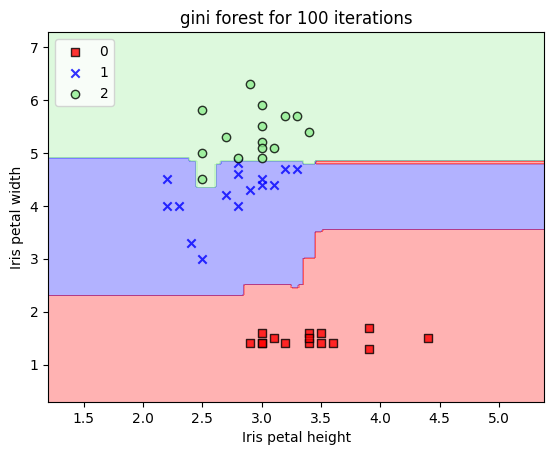

In [ ]:
# Mały las dla gini - 10 iteracji
forest_gini_small = RandomForestClassifier(criterion='gini', n_estimators=10)
forest_gini_small.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_gini_small, test_idx=range(105, 150))
plt.title('gini forest 10 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Duży las dla gini - 50 iteracji
forest_gini_big = RandomForestClassifier(criterion='gini', n_estimators=50)
forest_gini_big.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_gini_big, test_idx=range(105, 150))
plt.title('gini forest for 50 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Wielki las dla gini - 100 iteracji
forest_gini_large = RandomForestClassifier(criterion='gini', n_estimators=100)
forest_gini_large.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_gini_large, test_idx=range(105, 150))
plt.title('gini forest for 100 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


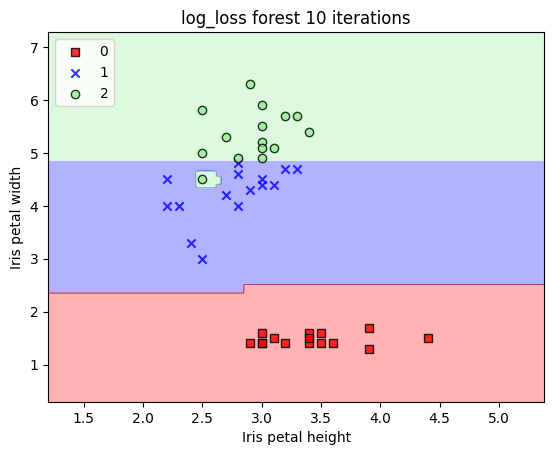

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


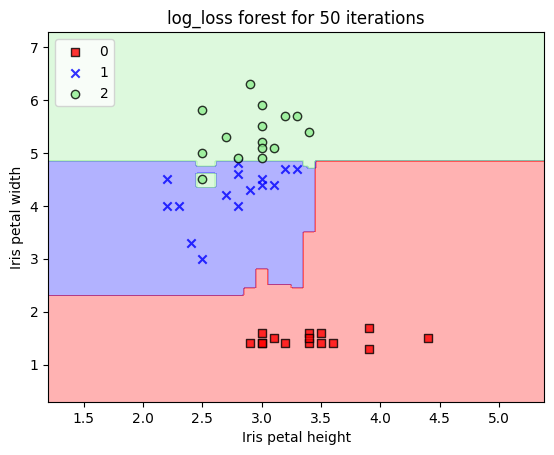

<ipython-input-3-250138392a7c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-250138392a7c>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


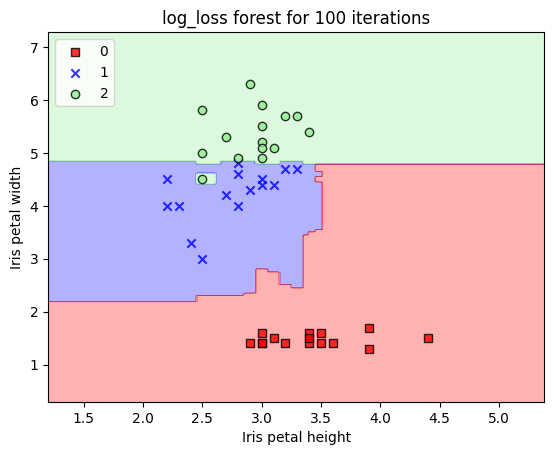

In [ ]:
# Mały las dla log_loss - 10 iteracji
forest_entropy_small = RandomForestClassifier(criterion='log_loss', n_estimators=10)
forest_entropy_small.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_small, test_idx=range(105, 150))
plt.title('log_loss forest 10 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Duży las dla log_loss - 50 iteracji
forest_log_loss_big = RandomForestClassifier(criterion='log_loss', n_estimators=50)
forest_log_loss_big.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_log_loss_big, test_idx=range(105, 150))
plt.title('log_loss forest for 50 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Wielki las dla log_loss - 100 iteracji
forest_log_loss_large = RandomForestClassifier(criterion='log_loss', n_estimators=100)
forest_log_loss_large.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_log_loss_large, test_idx=range(105, 150))
plt.title('log_loss forest for 100 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# opis
Liczba iteracji ma wpływ na precyzję klasyfikacji - im więcej iteracji, tym wyższa jest dokładność. Granice pomiędzy klasami stają się również wyraźniejsze.


# Program